In [1]:
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.datasets import mnist
import numpy as np

# Load the MNIST dataset (28x28 grayscale images)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values (0-255 → 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0  

# Flatten the 28x28 images into 1D vectors (28*28 = 784)
X_train = X_train.reshape(X_train.shape[0], -1)  # (60000, 784)
X_test = X_test.reshape(X_test.shape[0], -1)     # (10000, 784)

# Define the MLP Model
model = MLPClassifier(
    hidden_layer_sizes=(128, 64),  # Larger hidden layers for image data
    activation='relu',  # ReLU helps with non-linearity
    solver='adam',  # Adam optimizer for better convergence
    learning_rate_init=0.001,  # Lower learning rate for stability
    max_iter=20,  # More iterations for better learning
    verbose=True,
    random_state=42
)

# Train the MLP model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = (y_pred == y_test).mean()
print(f"Test Accuracy: {accuracy:.4f}")




Iteration 1, loss = 0.38502588
Iteration 2, loss = 0.14950580
Iteration 3, loss = 0.10273425
Iteration 4, loss = 0.07876612
Iteration 5, loss = 0.06287742
Iteration 6, loss = 0.05150452
Iteration 7, loss = 0.04168628
Iteration 8, loss = 0.03421156
Iteration 9, loss = 0.02852425
Iteration 10, loss = 0.02430944
Iteration 11, loss = 0.02026940
Iteration 12, loss = 0.01670841
Iteration 13, loss = 0.01354651
Iteration 14, loss = 0.01485205
Iteration 15, loss = 0.01153144
Iteration 16, loss = 0.01095233
Iteration 17, loss = 0.00810442
Iteration 18, loss = 0.00709180
Iteration 19, loss = 0.00439719
Iteration 20, loss = 0.00553457
Test Accuracy: 0.9769


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


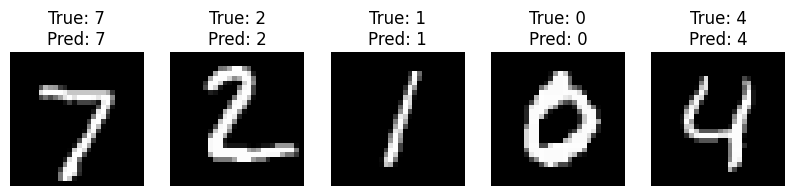

In [3]:
import matplotlib.pyplot as plt

misclassified_idx = np.where(y_pred == y_test)[0]
plt.figure(figsize=(10, 5))
for i, idx in enumerate(misclassified_idx[:5]):  # Show first 5 misclassified images
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}")
    plt.axis("off")
plt.show()